   index   C/A  UNIT       SCP STATION LINENAME  DIVISON        DATE  \
0      0  A002  R051  02-00-00   59 ST  NQR456W      NaN  09/25/2021   
1      1  A002  R051  02-00-00   59 ST  NQR456W      NaN  09/25/2021   
2      2  A002  R051  02-00-00   59 ST  NQR456W      NaN  09/25/2021   
3      3  A002  R051  02-00-00   59 ST  NQR456W      NaN  09/25/2021   
4      4  A002  R051  02-00-00   59 ST  NQR456W      NaN  09/25/2021   

       TIME     DESC  ENTRIES  EXITS                   DATE_TIME  \
0  00:00:00  REGULAR  7641078    NaN  2021-09-25 00:00:00.000000   
1  04:00:00  REGULAR  7641091    NaN  2021-09-25 04:00:00.000000   
2  08:00:00  REGULAR  7641100    NaN  2021-09-25 08:00:00.000000   
3  12:00:00  REGULAR  7641135    NaN  2021-09-25 12:00:00.000000   
4  16:00:00  REGULAR  7641265    NaN  2021-09-25 16:00:00.000000   

               Turnstile  Week_Day  
0  A002R05102-00-0059 ST  Saturday  
1  A002R05102-00-0059 ST  Saturday  
2  A002R05102-00-0059 ST  Saturday  
3  A002R05

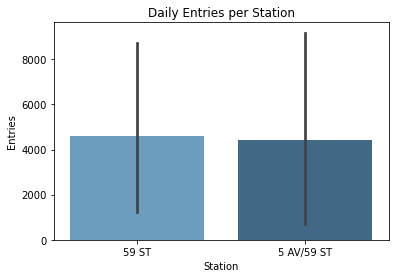

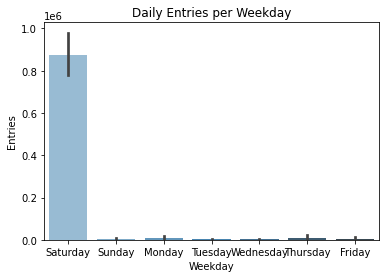

In [24]:
""" import libraries """

import pandas as pd
import sqlite3 as sql
import sqlalchemy as alchemy
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

"""" connect to DB """

db = sql.connect('MTA.db')
sql_query = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM subway
                               ''', db)
df = pd.DataFrame(sql_query, columns = ['index','C/A','UNIT','SCP','STATION','LINENAME','DIVISON','DATE','TIME','DESC','ENTRIES','EXITS','DATE_TIME','Turnstile','Week_Day'])

print(df.head())


"""" remove duplicates and spaces """
df.columns = [column.strip() for column in df.columns]
df.drop_duplicates()

""" get daily entries per turnstile """

turnstiles_df =df.groupby(["C/A", "UNIT", "SCP", "STATION","DATE_TIME","Week_Day"])[["ENTRIES"]].sum()
turnstiles_df["FOUR_HOURS_STATION_ENTRIES"]=turnstiles_df.ENTRIES.diff()

turnstiles_df["FOUR_HOURS_STATION_ENTRIES"]=(
np.where((
    (turnstiles_df.ENTRIES ==0) & (turnstiles_df.FOUR_HOURS_STATION_ENTRIES < 0)),0 # counter reset 
    , 
    np.where((turnstiles_df.ENTRIES !=0) & (turnstiles_df.FOUR_HOURS_STATION_ENTRIES < 0)
             , abs(turnstiles_df.FOUR_HOURS_STATION_ENTRIES), # return abs value
         turnstiles_df.FOUR_HOURS_STATION_ENTRIES) # return same value
))
turnstiles_df.reset_index(inplace=True)




"""" group by stations """
top_stations = turnstiles_df[['STATION','FOUR_HOURS_STATION_ENTRIES']].head(10000)

"""" group by weekdays """
top_weekdays = turnstiles_df[['Week_Day','FOUR_HOURS_STATION_ENTRIES']]
"""" plot station barchart """

ax = sns.barplot(x=top_stations['STATION'], y=top_stations["FOUR_HOURS_STATION_ENTRIES"],palette="Blues_d")


plt.title('Daily Entries per Station')
plt.xlabel('Station')
plt.ylabel('Entries')

plt.show()

"""" plot weekdays barchart """ 
ax2 = sns.barplot(x=top_weekdays['Week_Day'], y=top_weekdays["FOUR_HOURS_STATION_ENTRIES"],palette="Blues_d")
plt.title('Daily Entries per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Entries')

plt.show()